# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [11]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:,1:2].values

### Feature Scaling

In [12]:
training_set.shape

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
training_set_sc =sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [21]:
training_set_sc
X_train =[]
y_train =[]
for i in range(60,len(training_set)):
    X_train.append(training_set_sc[i-60:i,0])
    y_train.append(training_set_sc[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [34]:
y_train.shape

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [35]:
from keras.models import Sequential
from keras.layers import Dropout,LSTM,Dense

### Initialising the RNN

In [36]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [37]:
regressor.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [38]:
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [39]:
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [40]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [41]:
regressor.add(Dense(units =1))

### Compiling the RNN

In [42]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [43]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0374
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0057
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0054
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0047A: 1s - lo
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0050
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051A: 0s - loss: 0
Epoch 11/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0039
E

1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 94/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 95/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [65]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
test_set = dataset_test.iloc[:,1:2].values

### Getting the predicted stock price of 2017

In [66]:
dataset_test.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [67]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test =[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Visualising the results

In [68]:
predicted_value = regressor.predict(X_test)

In [69]:
predicted_value = sc.inverse_transform(predicted_value)

In [70]:
predicted_value

array([[771.6294 ],
       [768.99756],
       [768.58075],
       [769.4763 ],
       [772.29846],
       [777.5592 ],
       [782.89264],
       [785.69977],
       [786.4487 ],
       [786.1636 ],
       [785.6106 ],
       [785.06616],
       [784.72723],
       [785.1146 ],
       [786.0517 ],
       [790.0418 ],
       [796.40753],
       [803.6487 ],
       [808.2937 ],
       [805.80853]], dtype=float32)

<module 'matplotlib.pyplot' from 'C:\\Users\\harik\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

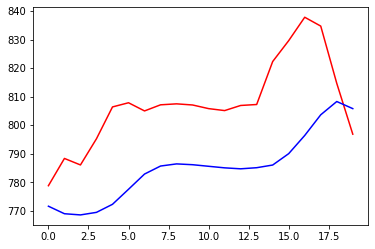

In [71]:
plt.plot(test_set, color = 'red', label =)
plt.plot(predicted_value, color = 'blue')
plt.title("predicted vs real google stock price")
